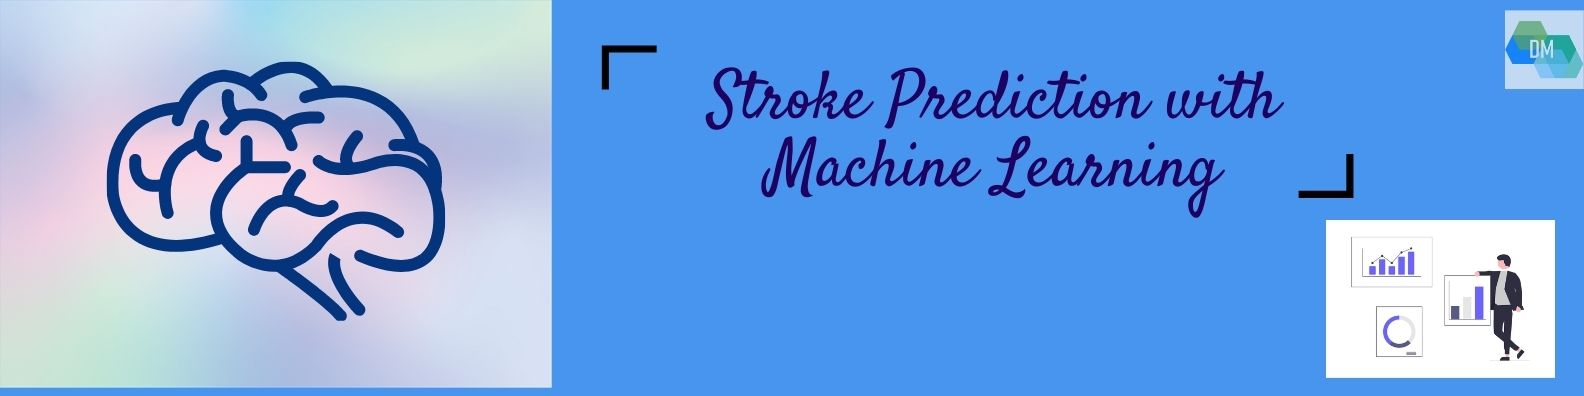

<blockquote>📌 According to World Health Organization, 15 million people suffer strokes worldwide each year. Of these, 5 million die and another 5 million are permanently disabled. Every year, more than 795,000 people in the United States have a stroke.
<br>
The objective of this project is to construct a machine learning model for predicting stroke and to evaluate the accuracy of the model. We are going to apply different machine learning algorithms to see which algorithms produce reliable results with good accuracy.</blockquote>

### <h3 style="background-color:#4895ef;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [ ]:
# getting started with the model 
# importing required libraries/packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import time for training details
from time import time
t0 = time()

### <h3 style="background-color:#4895ef;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [ ]:
# Importing and Reading the Dataset
df_stroke= pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

In [ ]:
df_stroke_row_count, df_stroke_column_count=df_stroke.shape
print('Total number of rows:', df_stroke_row_count)
print('Total number of columns:', df_stroke_column_count)

In [ ]:
df_stroke.describe()

In [ ]:
df_stroke.info()

### <h3 style="background-color:#4895ef;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [ ]:
df_stroke.isna().sum()

In [ ]:
print ("Unique values are:\n",df_stroke.nunique())

In [ ]:
#checking Datatypes
df_stroke.dtypes

### <h3 style="background-color:#4895ef;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for outliers ✏️ </centre></strong></h3>

In [ ]:
#counting outliers for bmi

bmi_outliers=df_stroke[df_stroke['bmi']>50]
bmi_outliers['bmi'].shape

In [ ]:
#replacing outlier entries with mean of bmi
df_stroke["bmi"] = df_stroke["bmi"].apply(lambda x: df_stroke.bmi.mean() if x>50 else x)

In [ ]:
# Replacing null values of bmi with mean of bmi column

df_stroke.bmi.replace(to_replace=np.nan,value=df_stroke.bmi.mean(), inplace=True)
print (df_stroke.shape)

In [ ]:
# missing values 
df_stroke.isna().sum()

In [ ]:
# Dropping not necessary Id column
df_stroke.drop(columns='id',inplace=True)

In [ ]:
df_stroke.head().iloc[:5]

In [ ]:
df_stroke.gender.value_counts()

In [ ]:
# number of 'other' is very small, converting the value to 'Male'
df_stroke['gender']=df_stroke['gender'].replace('Other','Male')

In [ ]:
df_stroke.replace({ 'gender': {'Male':1 ,'Female':0}} ,inplace=True)
df_stroke.replace({ 'ever_married': {'No':0 ,'Yes':1}} ,inplace=True)
df_stroke.replace({ 'Residence_type': {'Rural':0 ,'Urban':1}} ,inplace=True)
df_stroke.replace({ 'smoking_status': {'Unknown':0 ,'never smoked':1,'formerly smoked':2,'smokes':3}} ,inplace=True)
df_stroke.replace({ 'work_type': {'Private':0 ,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4}} ,inplace=True)

In [ ]:
#checking Datatypes
df_stroke.dtypes

### <h3 style="background-color:#4895ef;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Data Exploration for the Dataset 🔍 </centre></strong></h3>

In [ ]:
#Getting an idea about the distribution of gender 
p = sns.countplot(data=df_stroke, x = 'gender', palette='PuBuGn')

In [ ]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df_stroke['gender'].value_counts().index.tolist()[:2]
values = df_stroke['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df_stroke['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df_stroke['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df_stroke['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df_stroke['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df_stroke['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = df_stroke['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df_stroke['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

In [ ]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()
for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=df_stroke, ax=axs[i], hue =df_stroke['stroke'],palette='mako_r')

In [ ]:
#correlation map for features
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(df_stroke.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="icefire")

### <h3 style="background-color:#4895ef;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Dataset split for prediction ⏳ </centre></strong></h3>

In [ ]:
#Defining X and y
X = df_stroke.drop(['stroke'], axis=1)
y = df_stroke['stroke']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# 1. Using Random Forest Classifier
t0 = time()
# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
rf_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', rf_time)

#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

In [ ]:
#2. Gaussian Naive Bayes Classifier
t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

# Train the Classifier/fitting the model
gnb.fit(X_train, y_train)

# predict the response
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)
gnb_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Gaussian Naïve Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', gnb_time)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

In [ ]:
#import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train the Classifier/fitting the model
clf = clf.fit(X_train,y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
dt_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 

# evaluate accuracy
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', dt_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

In [ ]:
#kNN
import sys, os

# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the Classifier/fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
knn_time=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', knn_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Support Vector Machines trial
import sys, os

#Import svm model
from sklearn import svm
from sklearn.svm import SVC

#Create a svm Classifier
clf = SVC(C=1, kernel='rbf')

# Train the Classifier/fitting the model
clf.fit(X_train, y_train)

# predict the response
y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)
svm_time=(round(time() - t0, 3))
# evaluate accuracy
print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', svm_time)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

### <h3 style="background-color:#4895ef;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Plotting all accuracies 📊 </centre></strong></h3>

In [ ]:
# visualizing accuracies for all ML Algorithms using Matplotlib
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_knn, acc_svm]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='blue')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

# Create an instance of Pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score_skf = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score_skf)
    acc_skf = round(score_skf * 100, 2) # calculating accuracy for plot
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score_skf))
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

In [ ]:
#trial CV knn
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

# Create an instance of Pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score_skf = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score_skf)
    acc_skf_knn = round(score_skf * 100, 2) # calculating accuracy for plot
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score_skf))
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

# data pre-processing
X = preprocessing.StandardScaler().fit(X).transform(X)

# use StratifiedShuffleSplit()
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.5,
                             random_state=0)
sss.get_n_splits(X, y)
scores = []

clf = RandomForestClassifier(n_estimators=40, max_depth=7)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred) * 100)
    acc_sss = np.mean(scores)
    # get accurracy of each prediction
print(scores)
print('Avg Cross Validation accuracy for Shuffle split: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

In [ ]:
#trial knn
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

# data pre-processing
X = preprocessing.StandardScaler().fit(X).transform(X)

# use StratifiedShuffleSplit()
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.5,
                             random_state=0)
sss.get_n_splits(X, y)
scores = []

clf = KNeighborsClassifier(n_neighbors=3)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred) * 100)
    acc_sss_knn = np.mean(scores)
    # get accurracy of each prediction
print(scores)
print('Avg Cross Validation accuracy for Shuffle split: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

In [ ]:
# visualizing accuracies 
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM', 'RF-StratifiedKFold','RF-StratifiedShuffleSplit','knn-StratifiedKFold','knn-StratifiedShuffleSplit')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_knn, acc_svm,acc_skf,acc_sss,acc_skf_knn,acc_sss_knn ]
colors = ['b','b','b','b','b','r','r','r','r']
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color=colors)
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
x = df_stroke.age
y =df_stroke.bmi
plt.xlabel('Age')
plt.ylabel('bmi')
plt.scatter(x,y)

In [ ]:
df_stroke.drop(df_stroke[df_stroke.age < 20].index, inplace=True)

In [ ]:
print (df_stroke.shape)

In [ ]:
#Defining X and y
Xn = df_stroke.drop(['stroke'], axis=1)
yn = df_stroke['stroke']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
Xn_train, Xn_test , yn_train , yn_test = train_test_split(Xn,yn,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('Xn_train:', Xn_train.shape)
print('yn_train:', yn_train.shape)
print('Xn_test:', Xn_test.shape)
print('yn_test:', yn_test.shape)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# 1. Using Random Forest Classifier
t0 = time()
# Load random forest classifier 
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier/fitting the model
clf.fit(Xn_train, yn_train)

# predict the response
yn_pred = clf.predict(Xn_test)
acc_rf_n = round(clf.score(Xn_test,yn_test) * 100, 2)
rf_time_n=(round(time() - t0, 3))

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# evaluate accuracy
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(yn_test, yn_pred)*100,"%")
print('Training time', rf_time_n)

#Print Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(yn_test, yn_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Create an instance of Pipeline

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
scores = cross_val_score(pipeline, X=Xn_train, y=yn_train, cv=10, n_jobs=1)
 
print('Cross Validation accuracy scores with updated df: %s' % scores)
print('updated Avg Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))